<a href="https://colab.research.google.com/github/Het0c/Ep4Machine/blob/main/Decision_Tree_Counter_Strike_(Clasificacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelo Decision tree de la target RoundWinner



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D


## Importe de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Importamos DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn import tree

In [ ]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

/tmp/ipython-input-5-685412595.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


## Análisis estadístico básico

In [ ]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [ ]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [ ]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Dividiendo el csv para entrenamiento y pruebas

In [ ]:
# Definimos el target o variable objetivo
target = 'RoundWinner'

# Definimos las variables predictoras
features = [
    'RoundKills',
    'RoundDeaths',
    'KDR',
    'TeamStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'Map',
    'Team'
]

# Filtramos el DataFrame para quedarnos solo con filas donde 'RoundWinner' tenga valores válidos ('True' o 'False')
csgo = csgo[csgo['RoundWinner'].isin(['True', 'False'])]

# Creamos X con las variables predictoras y aplicamos one-hot encoding a las categóricas
X = csgo[features]
X = pd.get_dummies(X, columns=['Map', 'Team'])

# Creamos el vector objetivo y
y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)

# Mostramos muestra para verificar
print(X.head())
print(y.head())

   RoundKills  RoundDeaths  KDR  TeamStartingEquipmentValue  \
0           0            1  0.0                        4400   
1           0            1  0.0                        4400   
2           0            1  0.0                        4400   
3           0            1  0.0                        4400   
4           0            0  0.0                        4400   

   RLethalGrenadesThrown  RNonLethalGrenadesThrown  Map_de_dust2  \
0                      0                         4         False   
1                      0                         0         False   
2                      0                         0         False   
3                      0                         0         False   
4                      1                         1         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  Team_CounterTerrorist  \
0            True          False        False                  False   
1            True          False        False                  False

/tmp/ipython-input-9-1996762867.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)


In [ ]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear el modelo de Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos escalados
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluacion del modelo

In [ ]:
 # Importamos métricas de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generamos las predicciones del modelo de Random Forest usando el conjunto de prueba
y_pred = decision_tree_model.predict(X_test_scaled)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en formato similar al de regresión
print(f"Accuracy : {accuracy:.2f}")     # Precisión general del modelo
print(f"Precision: {precision:.2f}")    # Exactitud de los positivos
print(f"Recall   : {recall:.2f}")       # Cobertura de los positivos
print(f"F1 Score : {f1:.2f}")           # Balance entre precisión y recall

Accuracy : 0.71
Precision: 0.72
Recall   : 0.68
F1 Score : 0.70


### **Metricas**

**Accuracy (Precisión general) (0.71):**
El 71% de las predicciones del modelo coinciden con los resultados reales, lo cual representa un rendimiento general aceptable.

**Precision (0.72):** Esto indica que el modelo, al predecir que un equipo ganará una ronda, acierta el 72% de las veces. Esta precisión relativamente alta sugiere que el modelo es efectivo al detectar patrones fuertes o características que suelen preceder a una victoria, como el numero de kills en una ronda.

**Recall (Sensibilidad o Exhaustividad) (0.68):** El modelo logra identificar correctamente el 68% de todas las rondas realmente ganadas. Esto implica que pierde aproximadamente **1 de cada 3 victorias reales**. Esta caída respecto a la precisión (72%) indica que el modelo tiende a ser más selectivo: solo predice victoria cuando detecta condiciones muy específicas.

**F1 Score (0.70):** El F1 Score, como balance entre precisión y recall, indica un desempeño estable y equilibrado, aunque con ligera inclinación a predecir victorias solo cuando hay alta certeza.

## Visualizacion del modelo

### **Matriz de confusion**

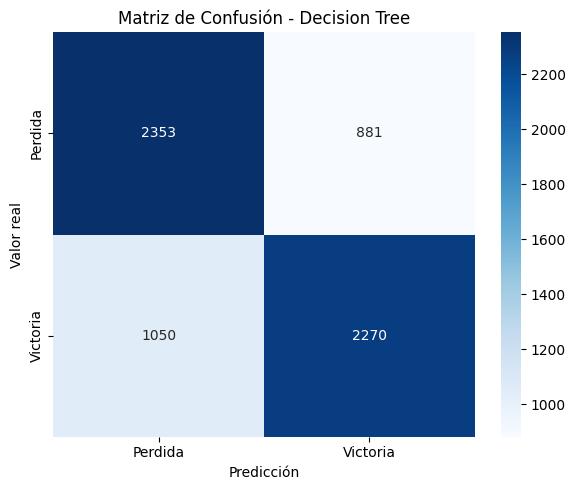

In [ ]:
#Generamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Para visualizar la matriz de confusion con etiquetas
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perdida', 'Victoria'], yticklabels=['Perdida', 'Victoria'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Decision Tree')
plt.tight_layout()
plt.show()

### **Curva ROC + AUC**

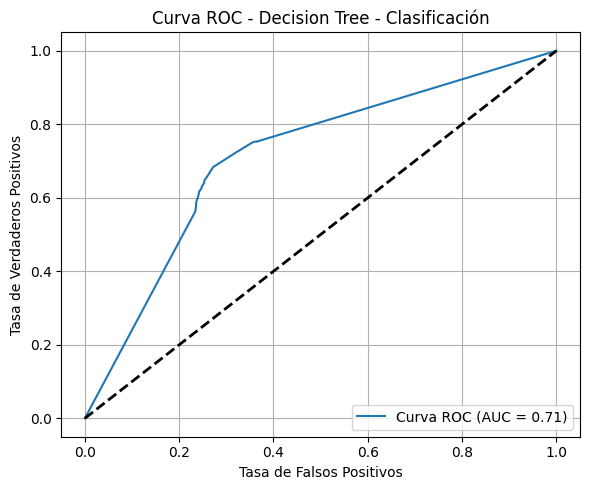

In [ ]:
y_prob = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})') # Cambiamos la etiqueta si es necesario
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree - Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Reporte de clasificacion**

In [ ]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Perdida', 'Victoria']))

Reporte de Clasificación:
              precision    recall  f1-score   support

     Perdida       0.69      0.73      0.71      3234
    Victoria       0.72      0.68      0.70      3320

    accuracy                           0.71      6554
   macro avg       0.71      0.71      0.71      6554
weighted avg       0.71      0.71      0.71      6554



### **Distribucion de probabilidades**

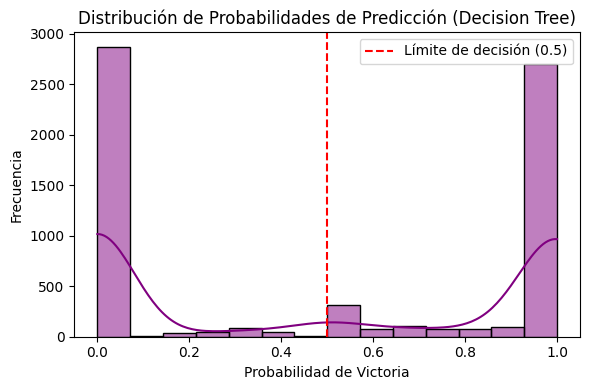

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, kde=True, color='purple') # Usamos y_prob calculada antes
plt.title("Distribución de Probabilidades de Predicción (Decision Tree)")
plt.xlabel("Probabilidad de Victoria")
plt.ylabel("Frecuencia")
plt.axvline(0.5, color='red', linestyle='--', label='Límite de decisión (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

### **Analisis visual**

El **AUC** de 0.71 indica un poder discriminativo moderado pero aceptable. La pequeña diferencia entre las dos curvas (0.71 vs 0.7) sugiere que el modelo generaliza razonablemente sin sobreajuste significativo.

El gráfico muestra una distribución con picos en probabilidades extremas (0 y 1) y pocas predicciones en valores intermedios, algo característico de Decision Trees, que tienden a generar predicciones "seguras" (cercanas a 0 o 1) en lugar de probabilidades calibradas.